## Comparison between the EU28, Germany and Greece
Compare all 3 education levels of the EU28 countries, Germany and Greece

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

BASE = os.path.join(os.pardir, "data")

In [2]:
# Import EU28 data
df_eu28 = pd.read_pickle(os.path.join(BASE, 
                                      "output",
                                      "education_employment_rate_eu28.pkl"))

In [3]:
# Import Germany data
df_germany = pd.read_pickle(os.path.join(BASE, 
                                         "output",
                                         "education_employment_rate_germany.pkl"))

In [4]:
# Import Greece data
df_greece = pd.read_pickle(os.path.join(BASE, 
                                        "output",
                                        "education_employment_rate_greece.pkl"))

In [5]:
df_germany.head()

,ED0-2,ED3_4,ED5-8,ED0-2low,ED3_4medium,ED5-8high
2005,51.9,69.6,82.8,48.1,30.4,17.2
2006,54.1,71.4,84.2,45.9,28.6,15.8
2007,55.0,73.3,85.4,45.0,26.7,14.6
2008,55.9,74.2,85.7,44.1,25.8,14.3
2009,55.7,74.1,86.3,44.3,25.9,13.7


### Dataset problems
Because we discovered the data isn't useable for the unemployment case, we created another combination dataframe so we can compare employment data.

- emp_combi = **em**ployment data
- combi = **unem**ployment data

Further explanation and the second combination dataset is found below under 'deprecated'

In [6]:
# Dataframes for unemployment 
dfs = [df_eu28, df_germany, df_greece]

# Dataframes for employment 
empl = [df.copy() for df in dfs]
countries = ["eu28", "germany", "greece"]

for i, df in enumerate(empl):
    # rename columns
    df.rename(columns={'ED0-2': f"low_{countries[i]}", 
                       'ED3_4': f"med_{countries[i]}", 
                       'ED5-8': f"high_{countries[i]}"},
              inplace=True)
    
    # drop employment columns
    unemp = ["ED0-2low", "ED3_4medium", "ED5-8high"]
    df.drop(columns=unemp, inplace=True)

# Merge df's
emp_combi = pd.concat(empl, axis=1)
emp_combi.index = emp_combi.index.astype(int)
emp_combi.head()

,low_eu28,med_eu28,high_eu28,low_germany,med_germany,high_germany,low_greece,med_greece,high_greece
2005,55.5,69.4,82.6,51.9,69.6,82.8,58.0,62.7,80.9
2006,56.3,70.4,83.2,54.1,71.4,84.2,59.6,62.9,82.1
2007,56.9,71.4,83.8,55.0,73.3,85.4,60.2,62.8,81.8
2008,56.4,71.7,83.8,55.9,74.2,85.7,60.4,63.3,82.0
2009,54.2,70.3,82.9,55.7,74.1,86.3,59.8,62.4,81.5


In [8]:
emp_combi.loc[2012]


low_eu28        52.1
med_eu28        69.6
high_eu28       81.9
low_germany     57.8
med_germany     76.8
high_germany    87.7
low_greece      48.0
med_greece      51.4
high_greece     70.3
Name: 2012, dtype: float64

In [21]:
# Export
filename = os.path.join(BASE, 
                        "output",
                        "education_employment_rate_de_el_eu28")
emp_combi.to_pickle(f"{filename}.pkl")
emp_combi.to_csv(f"{filename}.csv")

To make graphs in Tableau we need the data in another form. We use data for 2012.

In [21]:
year = 2012

trans = []
for i in range(9):
    # Make a row every for every 3 columns
    if i % 3:
        continue
        
    trans.append([countries[i // 3]] + list(emp_combi.loc[year][i: i + 3]))

# New column names
cols = ["geo", "low", "med", "hi"]

t_df = pd.DataFrame(trans, columns=cols).set_index("geo")

# Transpose these values 
t_df = t_df.T

In [27]:
# Remove the label of 'columns'
t_df.columns.name = ""

In [28]:
# Export the file to CSV
t_df.to_csv(os.path.join(BASE, 
                         "output",
                         "edu_emp_2012.csv"))

## Deprecated code
We discovered that we misinterpreted the data on education levels. There are three problems:
- The data is regarding employment, not unemployment
- The data is cumulative (If you have high level, you have also had low and medium schooling)
- The number is the rate of people employed vs total population. 

These three problems mean we cannot take the remainder of '100 - employed' as 'unemployed'. We changed our code so we couuld export some information and make a stacked bar plot in Tableau, however the code below is no longer used. 

In [13]:
# Original loop for unemployment data

for i, df in enumerate(dfs):
    # rename columns
    df.rename(columns={'ED0-2low': f"low_{countries[i]}", 
                       'ED3_4medium': f"med_{countries[i]}", 
                       'ED5-8high': f"high_{countries[i]}"},
              inplace=True)
    
    # drop employment columns
    emp = ["ED0-2", "ED3_4", "ED5-8"]
    df.drop(columns=emp, inplace=True)

# Merge df's
combi = pd.concat(dfs, axis=1)
combi.index = combi.index.astype(int)
combi.head()

,low_eu28,med_eu28,high_eu28,low_germany,med_germany,high_germany,low_greece,med_greece,high_greece
2005,44.5,30.6,17.4,48.1,30.4,17.2,42.0,37.3,19.1
2006,43.7,29.6,16.8,45.9,28.6,15.8,40.4,37.1,17.9
2007,43.1,28.6,16.2,45.0,26.7,14.6,39.8,37.2,18.2
2008,43.6,28.3,16.2,44.1,25.8,14.3,39.6,36.7,18.0
2009,45.8,29.7,17.1,44.3,25.9,13.7,40.2,37.6,18.5


Text(0.06, 0.5, 'Note')

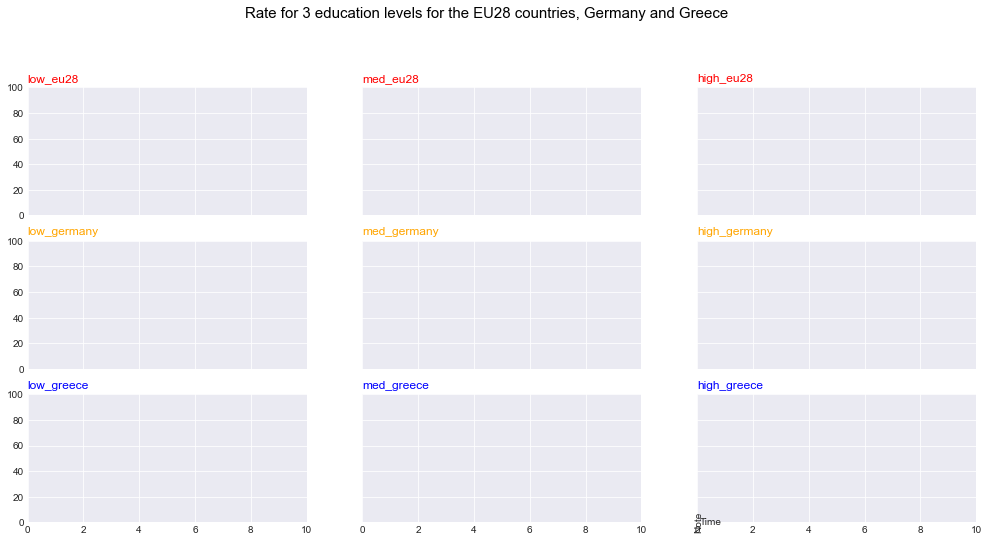

In [7]:
# Initialize the figure
plt.style.use("seaborn-darkgrid")
 
# create a color palette
palette = ["red", "orange", "blue"]

# multiple line plot
fig, axes = plt.subplots(3,3, figsize=(17,8))

for num, column in enumerate(emp_combi):
 
    # Plot the lineplot
    axes.flatten()[num].plot(emp_combi[column], 
                             marker='', 
                             color=palette[num // 3], 
                             linewidth=1.9, 
                             alpha=0.9, 
                             label=column)
 
    # Same limits for everybody!
    axes.flatten()[num].set_xlim(0,10)
    axes.flatten()[num].set_ylim(0,100)
 
    # Not ticks everywhere
    if num in range(6) :
        axes.flatten()[num].tick_params(labelbottom=False)
        
    if num not in [0,3,6] :
        axes.flatten()[num].tick_params(labelleft=False)
 
    # Add title
    axes.flatten()[num].set_title(column, 
                                  loc="left", 
                                  fontsize=12, 
                                  fontweight=0, 
                                  color=palette[num // 3])
 
# general title
title = "Rate for 3 education levels for the EU28 countries, Germany and Greece"

plt.suptitle(title, fontsize=15, fontweight=0, color='black', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')


### Findings
- The unemployment rate for the lower education levels is higher than the medium and higher levels of education. 
- Greece especially has an increase in unemployment after 2008, which we could assume happened after the financial crisis. 
- Germany, however, has a more stable or even decreasing unemployment rate overall. 
- Comparing Germany and the EU28 countries, it even looks like Germany has a lower unemployment rate overall, compared to all 28 EU countries combined

#### Relative rates
The code below was to calculate a relative rate for each level. However then we discovered the rates are cumative and referring to the total population iso active population. 

In [70]:
# Import total unemployment data
total = pd.read_pickle(os.path.join(BASE, 
                                    "pickles",
                                    "total_unemployment_rate.pkl"))
count_codes = ["EU28", "DE", "EL"]
drop = [col for col in total.columns if col not in count_codes]
total.drop(columns=drop, inplace=True)
total = total[count_codes]
total = total.loc[2012]

In [73]:
# Take one year
rel_rate = combi.loc[2012]

In [74]:
# Combine edu data with total unemployment data
rel_rate = pd.concat([rel_rate, total])

In [75]:
rel_rate


low_eu28        47.9
med_eu28        30.4
high_eu28       18.1
low_germany     42.2
med_germany     23.2
high_germany    12.3
low_greece      52.0
med_greece      48.6
high_greece     29.7
EU28            10.5
DE               5.4
EL              24.5
Name: 2012, dtype: float64

#### Calculate relative rates
After this prework we can loop over the 3 regions to calculate the relative rates.

In [78]:

rel_edu = []
i = 0

for country in countries:
    # For every country save a list with relative rates
    rel_edu.append({country: [round(rel_rate.iloc[i+x] / 
                              rel_rate[count_codes[x]], 2) 
                              for x in range(3)]})
    i += 3
print(rel_edu)

[{'eu28': [4.56, 5.63, 0.74]}, {'germany': [4.02, 4.3, 0.5]}, {'greece': [4.95, 9.0, 1.21]}]


### Findings
Looking at the relative rates, we can conclude they make no sense. We discard these findings and rework the original dataset.